SVR là một trong những thuật toán tinh tế và mạnh mẽ cho hồi quy, đặc biệt hiệu quả với dữ liệu nhỏ đến trung bình và mối quan hệ phi tuyến.

Mình sẽ trình bày theo đúng phong cách quen thuộc:

🔹 1. Nguyên lý hoạt động (không công thức nặng!)
🎯 Mục tiêu:
Tìm một hàm dự đoán sao cho sai số so với giá trị thực nằm trong một "dải dung sai" (ε-tube), và phạt những điểm vượt ra ngoài dải đó.

🧠 Ý tưởng chính — “Cho phép sai số nhỏ, chỉ quan tâm đến sai số lớn”
Trong Linear Regression, mọi sai số đều bị phạt (dù nhỏ).
Trong SVR, bạn chấp nhận sai số ≤ ε (ví dụ: ε = 0.5) → không phạt.
Chỉ khi sai số > ε, mới tính vào lỗi.
→ Điều này giúp mô hình ổn định hơn, ít bị ảnh hưởng bởi nhiễu nhỏ.

🔍 Trực quan:
Tưởng tượng bạn vẽ một dải dày (ε-tube) quanh đường dự đoán.
Mục tiêu: đưa càng nhiều điểm vào trong dải càng tốt.
Các điểm nằm ngoài dải gọi là support vectors — chúng xác định vị trí của dải.
💡 Xử lý phi tuyến?
Giống như SVM, SVR dùng kernel trick:
Linear: cho quan hệ tuyến tính.
RBF (Gaussian): cho quan hệ phi tuyến phức tạp (mặc định).
Polynomial: cho quan hệ đa thức.
→ Nhờ kernel, SVR có thể uốn cong dải để bao quanh dữ liệu phi tuyến.

✅ Ưu điểm:
Hiệu quả với dữ liệu có nhiễu (nhờ ε-tube).
Xử lý tốt phi tuyến (nhờ kernel).
Ít overfit nếu chọn tham số tốt.
❌ Hạn chế:
Chậm với dữ liệu lớn.
Khó tinh chỉnh: cần chọn C, ε, gamma, kernel...
Cần chuẩn hóa dữ liệu (vì dựa trên khoảng cách!).
3. Khi nào dùng SVR?
Dữ liệu
nhỏ đến trung bình
(< 10k mẫu)
Dữ liệu
rất lớn
→ quá chậm
Mối quan hệ
phi tuyến
nhưng không quá phức tạp
Cần
dự đoán cực nhanh
(real-time)
Bạn muốn
kiểm soát mức độ dung sai sai số
(qua ε)
Dữ liệu
chưa chuẩn hóa
Làm
baseline mạnh
cho bài toán hồi quy nhỏ
Cần
giải thích mô hình
(SVR là "hộp đen")
🎯 So sánh nhanh với các mô hình hồi quy trước:
Xử lý phi tuyến
❌ Kém
✅ Tốt
✅✅ Rất tốt
✅ Tốt (nhờ kernel)
Dữ liệu lớn
✅ Tốt
✅ Tốt
✅ Tốt
❌ Kém
Cần chuẩn hóa
Nên
Không
Không
✅
Bắt buộc
Tốc độ huấn luyện
Rất nhanh
Nhanh
Trung bình
❌ Chậm
Giải thích
✅ Tốt
✅ Rất tốt
Trung bình
❌ Kém
Ổn định với nhiễu
Kém
Trung bình
✅ Tốt
✅
Tốt (nhờ ε-tube)


✅ MSE (SVR): 0.0086
✅ R² (SVR): 0.9821


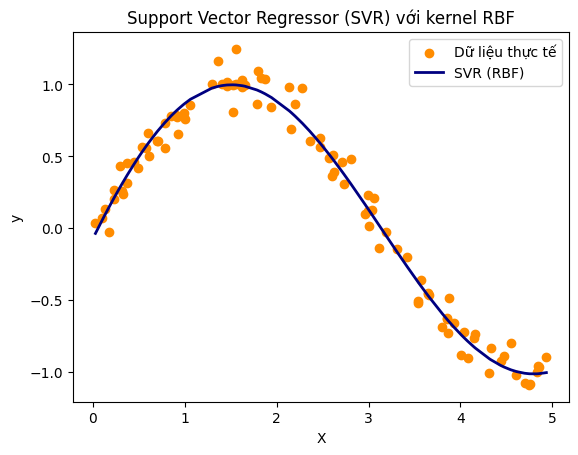

🔍 Linear Regression R²: 0.6118


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Tạo dữ liệu phi tuyến (dùng hàm sin để minh họa)
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

# Chuẩn hóa (SVR rất nhạy!)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Huấn luyện SVR với kernel RBF
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_scaled, y_scaled)

# Dự đoán
y_pred_scaled = svr_rbf.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Đánh giá
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"✅ MSE (SVR): {mse:.4f}")
print(f"✅ R² (SVR): {r2:.4f}")

# Vẽ kết quả
plt.scatter(X, y, color='darkorange', label='Dữ liệu thực tế')
plt.plot(X, y_pred, color='navy', lw=2, label='SVR (RBF)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regressor (SVR) với kernel RBF')
plt.legend()
plt.show()

# So sánh với Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_lr = lr.predict(X)
print(f"🔍 Linear Regression R²: {r2_score(y, y_lr):.4f}")